<a href="https://colab.research.google.com/github/Kinzibarn/IS_4487/blob/main/week3lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IS 4487 Module 2 Script

## Agenda

- Loading installed packages
- Inspect data
- Explore plot types 

Make sure you have downloaded tonight's script and data from Canvas.

##Load Libraries

In this class we will be using 
- Pandas
- Scikitlearn
- Matplotlib

We can pull sample data from 
- statsmodels.api

In [22]:
import pandas as pd
import matplotlib as mpl
import sklearn as sl
import matplotlib.pyplot as plt
import numpy as np

## Getting data into Pandas

In this case we will load data from the statsmodels.org library

See the Canvas assignments and lectures for a description of the Megatelco data

**Note:** you will need to enter a code supplied by Google in the next step. 


In [5]:
from google.colab import drive 
drive.mount('/content/gdrive', force_remount=True)

df = pd.read_csv (r'/content/gdrive/MyDrive/Colab Notebooks/megatelco.csv')

print (df)

Mounted at /content/gdrive
     college  income  overage  leftover   house  handset_price  \
0        one   23859       70         0  519105            154   
1       zero   72466       67        16  271182            262   
2       zero   30883       60         0  647281            211   
3        one   44512        0        22  754958            232   
4       zero   70535        0         0  653421            310   
...      ...     ...      ...       ...     ...            ...   
4995    zero   93699       26        56  385632            384   
4996    zero   25806       67        87  691020            142   
4997     one   97033      138        28  710559            311   
4998    zero   91558      229        15  853464            379   
4999     one  115943      200        42  173038            459   

      over_15mins_calls_per_month  average_call_duration  \
0                             5.0                      8   
1                             5.0                      5   


In [ ]:
#look at the top rows
df.head(10) 

In [ ]:
#look at last rows
df.tail(10) 

In [6]:
#get a summary of the dataset
df.describe()

,income,overage,leftover,house,handset_price,over_15mins_calls_per_month,average_call_duration,id
count,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03,4997.000000,5000.000000,5000.000000
mean,79912.948400,85.119200,24.243600,493656.326600,7.876236e+02,7.744647,5.958800,10036.639400
std,41703.042384,85.655622,26.847496,254287.193865,2.828291e+04,8.806070,4.390417,5813.620304
min,-28811.000000,0.000000,0.000000,-796132.000000,1.300000e+02,0.000000,1.000000,2.000000
25%,41592.500000,0.000000,0.000000,260586.500000,2.190000e+02,1.000000,2.000000,4950.500000
50%,75041.500000,59.000000,15.000000,451865.500000,3.220000e+02,4.000000,5.000000,10126.000000
75%,115475.000000,177.000000,42.000000,701608.750000,5.280000e+02,14.000000,9.000000,15085.250000
max,159938.000000,335.000000,89.000000,1000000.000000,2.000234e+06,29.000000,15.000000,20000.000000


In [7]:
#look at the datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   college                      5000 non-null   object 
 1   income                       5000 non-null   int64  
 2   overage                      5000 non-null   int64  
 3   leftover                     5000 non-null   int64  
 4   house                        5000 non-null   int64  
 5   handset_price                5000 non-null   int64  
 6   over_15mins_calls_per_month  4997 non-null   float64
 7   average_call_duration        5000 non-null   int64  
 8   reported_satisfaction        5000 non-null   object 
 9   reported_usage_level         5000 non-null   object 
 10  considering_change_of_plan   5000 non-null   object 
 11  leave                        5000 non-null   object 
 12  id                           5000 non-null   int64  
dtypes: float64(1), int

## Clean up the data
Did you notice anything unusual about the "house" amounts? 

How about the handset price and income?

In [8]:
df_clean = df[(df['house'] > 0) & (df['income'] > 0) & (df['handset_price'] < 1000)]
df_clean.describe()

,income,overage,leftover,house,handset_price,over_15mins_calls_per_month,average_call_duration,id
count,4997.000000,4997.000000,4997.000000,4997.000000,4997.000000,4994.000000,4997.000000,4997.000000
mean,79918.829498,85.116270,24.247549,494019.823294,387.558935,7.739287,5.957174,10034.365619
std,41673.392025,85.638266,26.848091,253648.357473,213.614256,8.802897,4.388938,5814.189195
min,20028.000000,0.000000,0.000000,150305.000000,130.000000,0.000000,1.000000,2.000000
25%,41593.000000,0.000000,0.000000,260729.000000,219.000000,1.000000,2.000000,4949.000000
50%,75026.000000,59.000000,15.000000,452277.000000,322.000000,4.000000,5.000000,10125.000000
75%,115464.000000,177.000000,42.000000,701614.000000,528.000000,14.000000,9.000000,15084.000000
max,159938.000000,335.000000,89.000000,1000000.000000,899.000000,29.000000,15.000000,20000.000000


# Add Derived Attribute

Add a column with the income in K (thousands)

In [9]:
df_clean['income_k'] = (df_clean['income']/1000).round(2)
df_clean.head()

<ipython-input-9-41bea05a8bf4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['income_k'] = (df_clean['income']/1000).round(2)


,college,income,overage,leftover,house,handset_price,over_15mins_calls_per_month,average_call_duration,reported_satisfaction,reported_usage_level,considering_change_of_plan,leave,id,income_k
0,one,23859,70,0,519105,154,5.0,8,low,low,yes,LEAVE,8183,23.86
1,zero,72466,67,16,271182,262,5.0,5,low,low,yes,LEAVE,12501,72.47
2,zero,30883,60,0,647281,211,3.0,8,low,low,yes,STAY,7425,30.88
3,one,44512,0,22,754958,232,0.0,5,low,low,no,LEAVE,13488,44.51
4,zero,70535,0,0,653421,310,0.0,14,low,low,yes,STAY,11389,70.54


## Slice the data  
 What is average house price at the two levels of leave?

 Conclusion?  Stayers have substantially more expensive homes.

In [13]:
df_clean[['house','leave']].groupby('leave').mean().round(2) 

,house
leave,
LEAVE,439255.26
STAY,547591.97


# This is my code
Dropping Column ID since it does not pertain to our analysis

In [12]:
df_clean.drop(columns=['id'])

,college,income,overage,leftover,house,handset_price,over_15mins_calls_per_month,average_call_duration,reported_satisfaction,reported_usage_level,considering_change_of_plan,leave,income_k
0,one,23859,70,0,519105,154,5.0,8,low,low,yes,LEAVE,23.86
1,zero,72466,67,16,271182,262,5.0,5,low,low,yes,LEAVE,72.47
2,zero,30883,60,0,647281,211,3.0,8,low,low,yes,STAY,30.88
3,one,44512,0,22,754958,232,0.0,5,low,low,no,LEAVE,44.51
4,zero,70535,0,0,653421,310,0.0,14,low,low,yes,STAY,70.54
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,zero,93699,26,56,385632,384,5.0,1,high,low,yes,LEAVE,93.70
4996,zero,25806,67,87,691020,142,4.0,2,high,low,no,STAY,25.81
4997,one,97033,138,28,710559,311,10.0,2,low,high,yes,STAY,97.03
4998,zero,91558,229,15,853464,379,27.0,4,high,low,no,STAY,91.56


Dropping all the nulls

In [14]:
df_clean.dropna()

,college,income,overage,leftover,house,handset_price,over_15mins_calls_per_month,average_call_duration,reported_satisfaction,reported_usage_level,considering_change_of_plan,leave,id,income_k
0,one,23859,70,0,519105,154,5.0,8,low,low,yes,LEAVE,8183,23.86
1,zero,72466,67,16,271182,262,5.0,5,low,low,yes,LEAVE,12501,72.47
2,zero,30883,60,0,647281,211,3.0,8,low,low,yes,STAY,7425,30.88
3,one,44512,0,22,754958,232,0.0,5,low,low,no,LEAVE,13488,44.51
4,zero,70535,0,0,653421,310,0.0,14,low,low,yes,STAY,11389,70.54
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,zero,93699,26,56,385632,384,5.0,1,high,low,yes,LEAVE,19270,93.70
4996,zero,25806,67,87,691020,142,4.0,2,high,low,no,STAY,14549,25.81
4997,one,97033,138,28,710559,311,10.0,2,low,high,yes,STAY,9972,97.03
4998,zero,91558,229,15,853464,379,27.0,4,high,low,no,STAY,12685,91.56


Box plot the income from the clean data

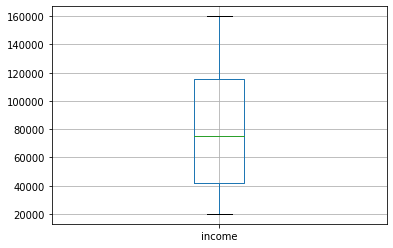

In [20]:
boxplot = df_clean.boxplot(column=['income'])

use a pie chart to show satisfaction

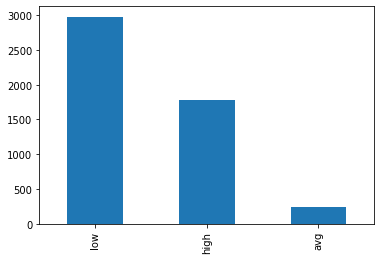

In [27]:
df_clean['reported_usage_level'].value_counts().plot(kind='bar')

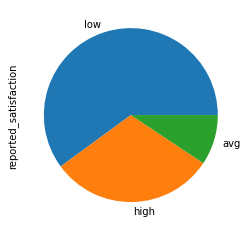

In [26]:
df_clean['reported_satisfaction'].value_counts().plot(kind='pie')